# Twitter Sentiment Analysis

### In this project, we try to implement a Twitter sentiment analysis model that helps to overcome the challenges of identifying the sentiments of the tweets whether they are positive, negative or neutral in nature.

# Quick Info

Dataset contains two columns :

**clean_text** --> which consist of tweets

**category** --> which consist of three categories

    :- -1 ---> negative tweet
    :- 1 ---> postive tweet
    :- 0 ---> neutral tweet

---



## Model Used

    SVM:- It tries to maximize the margin between the closest support vectors

Also as compared to other Machine Learning model's SVC was showing the Highest accuracy.

---

## Data Visualization

    1. Plotting the distribution for dataset.

    2. Count Plot


---

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Installing necessary requirements
!pip install tweet-preprocessor

# importing the Libraries

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv('/content/drive/MyDrive/twitter/Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


## Exploratory Data Analysis

---

In [35]:
df. shape

(162969, 2)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [37]:
df.dtypes

clean_text     object
category      float64
dtype: object

## Data Visualization

---


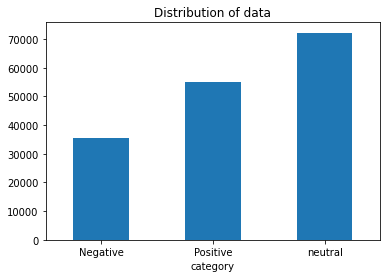

In [39]:
# Plotting the distribution for dataset.
ax = df.groupby('category').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive', 'neutral'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['clean_text']), list(df['category'])

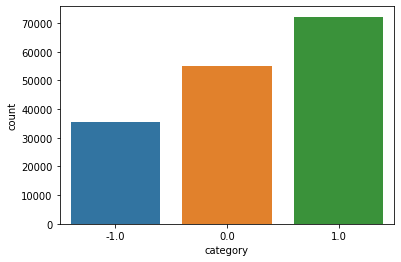

In [40]:
sns.countplot(x='category', data=df)

In [16]:
sum(df["category"] == 0)

55213

In [17]:
sum(df["category"] == 1)

72250

In [18]:
sum(df["category"] == -1)

35510

In [19]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [20]:
df = df.dropna(axis = 0, how ='any')
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [23]:
# reducing the size of Dataset
df1 = df[:20000]

## Splitting the Dataset

---

In [24]:
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = df1.category.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(df1.clean_text.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

## Transforming Dataset using Count Vectorizer

---

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

## Training the Model on the training dataset obtained by spliting the Dataset

---

In [27]:
from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)

## Displaying the Accuracy

---

In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  79.11666666666667 %


## Displaying the Accuracy as the length of dataset increases


---

In [34]:
for i in range(20000, 40000, 5000):
  print("for data set with rows = ", i)
  df1 = df[:i]
  from sklearn.model_selection import train_test_split

  y = df1.category.values

  x_train, x_test, y_train, y_test = train_test_split(df1.clean_text.values, y, 
                                                      stratify=y, 
                                                      random_state=1, 
                                                      test_size=0.3, shuffle=True)
  from sklearn.feature_extraction.text import CountVectorizer

  vectorizer = CountVectorizer(binary=True, stop_words='english')

  vectorizer.fit(list(x_train) + list(x_test))

  x_train_vec = vectorizer.transform(x_train)

  x_test_vec = vectorizer.transform(x_test)

  from sklearn import svm

  svm = svm.SVC(kernel = 'linear', probability=True)

  prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

  y_pred_svm = svm.predict(x_test_vec)

  from sklearn.metrics import accuracy_score

  print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%', "\n")

for data set with rows =  20000 
 Accuracy score for SVC is:  79.11666666666667 % 

 for data set with rows =  25000 
 Accuracy score for SVC is:  79.84 % 

 for data set with rows =  30000 
 Accuracy score for SVC is:  81.23333333333333 % 

 for data set with rows =  35000 
 Accuracy score for SVC is:  82.6952380952381 % 



## Conclusion

---

As we can see that the Accuracy of the model is increasing as the Dataset is increasing, we can get a rough idea that on training it on the Dataset of more than 1.5 lakh rows it will definetly give a very high Accuracy.

    The More the Length of the Dataset the more will be the Accuracy of the model.


NOTE:

    Since the Training Requires more Computation Power, this notebook was only able to achieve an accuracy of 82.7% considering 35000 rows for training. Increasing the training data requires high Computation power through which we will be able to achieve High accuracy. 


Hence, we have successfully Build a model on Twitter Sentiment Analysis as per the given Categories

---